In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
df=pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [3]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.shape

(96, 2)

In [6]:
df.set_index('Month',inplace=True)

In [7]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [8]:
# removed the duplicated

df.drop_duplicates(inplace=True)


In [9]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


<AxesSubplot:xlabel='Month'>

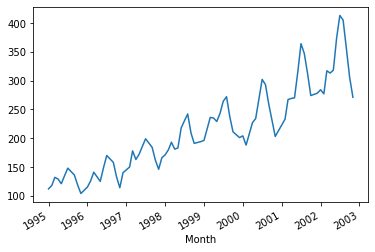

In [10]:
df.Passengers.plot()

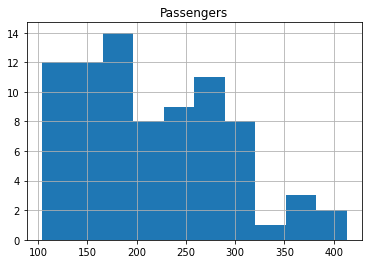

In [11]:
#Histogram and Density Plots

df.hist()
plt.show()

In [12]:
# Tranformations

# 1) Square Root Transform

dfa=pd.DataFrame(df.values)
dfa.columns=['Passengers']
dfa['Passengers']=np.sqrt(dfa['Passengers'])

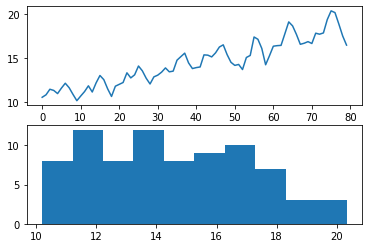

In [13]:
#line plot

plt.subplot(211)
plt.plot(dfa['Passengers'])

#histogram
plt.subplot(212)
plt.hist(dfa['Passengers'])
plt.show()

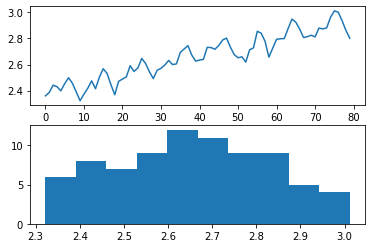

In [14]:
# 2) Log Transform

dfa=pd.DataFrame(dfa.values)
dfa.columns=['Passengers']
dfa['Passengers']=np.log(dfa['Passengers'])

#line plot
plt.subplot(211)
plt.plot(dfa['Passengers'])

#histogram
plt.subplot(212)
plt.hist(dfa['Passengers'])
plt.show()

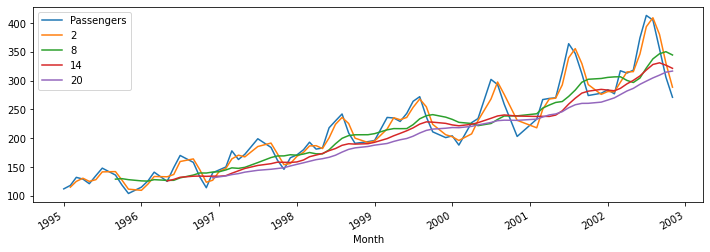

In [15]:
# Moving Average
plt.figure(figsize=(12,4))
df['Passengers'].plot()
df['Passengers'].rolling(10).mean().plot


for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()

In [16]:
df.reset_index(inplace=True)
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
75,2002-07-01,413
76,2002-08-01,405
77,2002-09-01,355
78,2002-10-01,306


In [17]:
df["month"] = df.Month.dt.strftime("%b") # month 
df["year"] = df.Month.dt.strftime("%Y") # year 
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [18]:
import datetime
df['m'] = range(1,(df.shape[0]+1))
df['m_square'] = np.power(df['m'],2)
df['log_Passengers']=np.log(df['Passengers'])
df.head()


,Month,Passengers,month,year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


In [19]:
ddf = pd.get_dummies(df.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
df=pd.concat([df,ddf],axis=1)
df

,Month,Passengers,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,Jul,2002,76,5776,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
76,2002-08-01,405,Aug,2002,77,5929,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
77,2002-09-01,355,Sep,2002,78,6084,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
78,2002-10-01,306,Oct,2002,79,6241,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(df,columns=col)
df1

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1,1,1995,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,2,4,1995,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,3,9,1995,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,4,16,1995,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,5,25,1995,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,Jul,76,5776,2002,6.023448,0,0,0,0,0,0,1,0,0,0,0,0
76,2002-08-01,405,Aug,77,5929,2002,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
77,2002-09-01,355,Sep,78,6084,2002,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
78,2002-10-01,306,Oct,79,6241,2002,5.723585,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
train = df1.head(70)
test = df1.tail(10)

In [28]:
# Apply different forecasting methods

# 1) linear model

linear_model=smf.ols('Passengers~m',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['m'])))
rmse_linear=np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

53.011390732242546

In [29]:
#2) Exponential model

exp=smf.ols('log_Passengers~m',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['m'])))
rmse_exp=np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

332.4568356884157

In [30]:
# 3)Quadratic model

quad=smf.ols('Passengers~m+m_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['m','m_square']])))
rmse_quad=np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

47.601245624733224

In [31]:
# 4)Additive seasonality

add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

rmse_add_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

133.83160113796723

In [32]:
# 5)Additive Seasonality with Quadratic trend

add_sea_que=smf.ols('Passengers~m+m_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_que=pd.Series(add_sea_que.predict(test[['m','m_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_que=np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_que))
rmse_add_sea_que

24.297691319904377

In [35]:
# 6)Multiplicative Seasonality

mul_sea=smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea=pd.Series(mul_sea.predict(test[['m','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mult_sea=np.sqrt(mean_squared_error(test['Passengers'],pred_mult_sea))
rmse_mult_sea

332.4537978003976

In [36]:
# compare the results of all models

data={'MODEL':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_add_sea_que','rmse_mult_sea']),
     'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_que,rmse_mult_sea])
     }

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
4,rmse_add_sea_que,24.297691
2,rmse_quad,47.601246
0,rmse_linear,53.011391
3,rmse_add_sea,133.831601
5,rmse_mult_sea,332.453798
1,rmse_exp,332.456836
